<h1><center>Lecture 11:<br>Text normalization<br></center></h1><h2><center>Feb. 16 2023<br></center></h2>


<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/08/stop-word.jpg" width=800 height=800 /></center>

# Updates
### This week:
* HW 2 is due _now_
* J & M Section 2.4 & 2.5
* Quiz 6 due Friday

### Questions, comments, concerns?

# Quiz 5 Review
* Note: I manually re-graded everything.

1. Write a regular expression that will match:
    
    `aaaabcc`<br>
    `aabbbbc`<br>
    `aacc`
   
   But not:
   
   `a`

Possible answers:

`aa`, `aa+`, `aa+b*c+`, `a{2,4}b{0,4}c{1,2}`

2. Write a regular expression that will match:
    
    `cat`<br>
    `hat`
    
    But not:
        
    `mat`

Possible answers:

`[ch]at`, `[^m]at`

3. Which of the following strings will NOT be matched by the following regular expression? (Choose all that apply).

`\w+|[^\w\s]+`

* [ ] `hello`
* [x] `$'78` - sort of...
* [ ] `hi_there2`
* [ ] `best_friend`

4. Write a regular expression for the following language:
    
the set of all lower case alphabetic strings ending in a 'b'

`[a-z]*b$`

5. Write a regular expression for the following language:

the set of all strings of two repeated words, separated by a space

Possible answers:

`([a-ZA-Z]+)\s\1`, `([a-ZA-Z]+) \1`

# Moving on: Text Normalization

* We can't look at text or data as-is if we want to analyze it or use it for NLP, so we need to first _normalize_ it
* There are several ways to normalize texts/corpora:
    * Word tokenization
    * Word normalization
    * Sentence segmentation

## Word tokenization
* How many words are in this sentence?<br>
"Atlas screamed at the squirrel and then giggled"

* How many words are in these sentences?
    * "I think-uh someone needs a new diaper"
    * "Atlas screamed AHHH and high-fived his father"
    * "The cat's tail was being pulled and the cat was angry"
    * "Wh-what do you think you're doing"

#### Sometimes it's not so clear.

* Disfluencies:
    * **fragments**: wh-what
    * **fillers**: think-uh, what..umm...

We will choose what we want to consider a 'word' based on what our task is:
* Some disfluencies can be useful:

   * Predicting the upcoming word
   * Speaker identification
   * Check out Clark and Fox (2002)
        * _uh_ vs. _um_
        * ''The argument is that uh and um are conventional English words, and speakers plan for, formulate, and produce them just as they would any word.''
        * Potential final project topic?


<center><img src="https://www.duarte.com/wp-content/uploads/Verbal_Fillers_Blog_AM.png" width=500 height=500 /></center>

## Lemma
* Same stem, part of speech, word sense (remember from Wordnet?)
* Let's look again at:
    * "The **cat's** tail was being pulled and the **cat** was angry"
    * cat's = cat

## Wordform
* Full inflected surface form
    * "The **cat's** tail was being pulled and the **cat** was angry"
    * cat's $\not=$ cat

### Remember token vs. type?

* What we count as a token or type is also dependent on our task!

They lay back on the San Francisco grass and looked at the stars and their...

How many word _tokens_ are in this sentence?

14 or 15?

* San Francisco...

They lay back on the San Francisco grass and looked at the stars and their...

How many word _types_ are in this sentence?

11 or 12 or 13?

* San Francisco
* they, their

# Stopwords
* Remember when we talked about Zipf's Law, we looked at the most frequent words in English

In [1]:
from nltk.corpus import brown
from nltk.probability import FreqDist

In [5]:
words = [w.lower() for w in brown.words() if w.isalpha()]
wordFreq = FreqDist(words)
wordFreq.most_common()[:20]

[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548),
 ('for', 9489),
 ('it', 8760),
 ('with', 7289),
 ('as', 7253),
 ('his', 6996),
 ('on', 6741),
 ('be', 6377),
 ('at', 5372),
 ('by', 5306),
 ('i', 5164)]

* A lot of these are **stopwords**:
    * Words that (typically) do not contribute to the meaning of a topic
* NLTK has a pre-defined list of these!

In [2]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [3]:
stopwords.words('spanish')

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

### How many stopwords are in the following sentence?
_The cat's tail was being pulled and the cat was angry._


* How can we remove all the stopwords from the sentence using the pre-defined stopwords list in NLTK?

In [9]:
x = "the cat's tail was being pulled and the cat was angry".split()
print(x)

['the', "cat's", 'tail', 'was', 'being', 'pulled', 'and', 'the', 'cat', 'was', 'angry']


In [16]:
stopwords = stopwords.words('english')
x_nostop = [word for word in x if word not in stopwords]
print(x_nostop)

["cat's", 'tail', 'pulled', 'cat', 'angry']


In [17]:
brownWords = [word.lower() for word in brown.words() if word.isalpha()]
len(brownWords)

981716

In [18]:
words_nostops = [word for word in brownWords if word not in stopwords]

In [19]:
len(words_nostops)

509267

In [20]:
len(words_nostops)/len(brownWords) # About 50% stopwords!

0.5187518589897689

### How can we get words from a text?
* A good place to start (in English) is with separating by spaces, which we know how to do quite easily!

In [5]:
from nltk.corpus import gutenberg # A corpus of some older books
# Here is a bunch of raw text.
alice = gutenberg.raw('carroll-alice.txt')
#print(alice)

In [10]:
aliceWords = alice.split() 
print(aliceWords[:100])

["[Alice's", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865]', 'CHAPTER', 'I.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank,', 'and', 'of', 'having', 'nothing', 'to', 'do:', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading,', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it,', "'and", 'what', 'is', 'the', 'use', 'of', 'a', "book,'", 'thought', 'Alice', "'without", 'pictures', 'or', "conversation?'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(as', 'well', 'as', 'she', 'could,', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid),', 'whether', 'the', 'pleasure', 'of', 'making', 'a']


## Good news: NLTK has a built-in word tokenizer

In [11]:
from nltk.tokenize import word_tokenize
aliceToken = word_tokenize(alice)
print(aliceToken[:100]) # What differences do you notice here?

['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'and", 'what', 'is', 'the', 'use', 'of', 'a', 'book', ',', "'", 'thought', 'Alice', "'without", 'pictures', 'or', 'conversation', '?', "'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot']


## Challenges:
* What about languages other than English?

## Challenges:
* What about languages other than English?
* Ex: French
    * _L'ensemble_ - Is this one token or two?
    * L? L'? Le?
    * We want _l'ensemble_ to match _un ensemble_

## Challenges:
* What about languages other than English?
* Ex: German noun compounds
    * Lebensverischerungsgesellschaftsangestellter

   * 'life insurance company employee"

## Challenges:
* What about languages other than English?
* Ex: Mandarin Chinese
    * No spaces between words
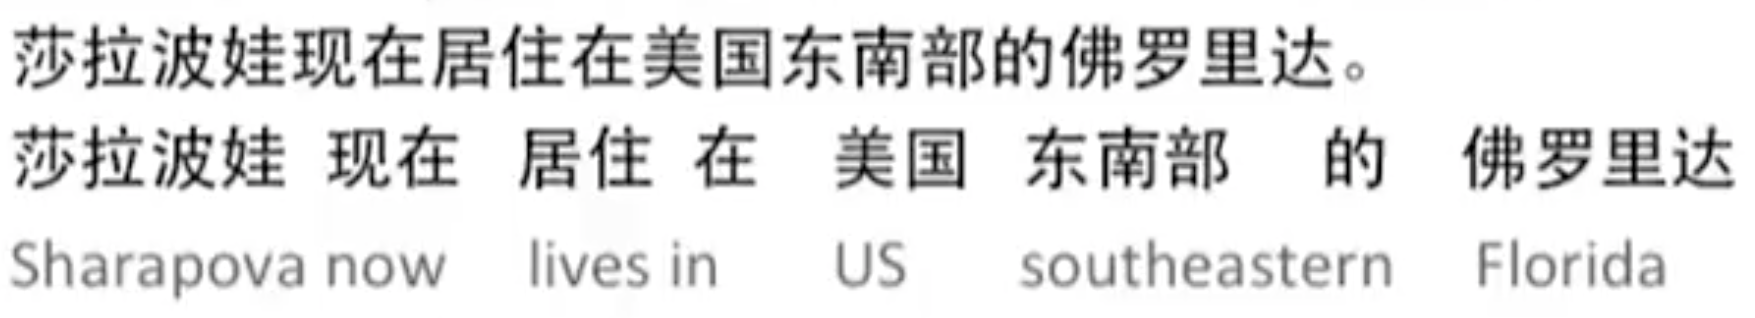

## Challenges:
* What about languages other than English?
* Ex: Japanese
    * No spaces between words
    * And multiple alphabets
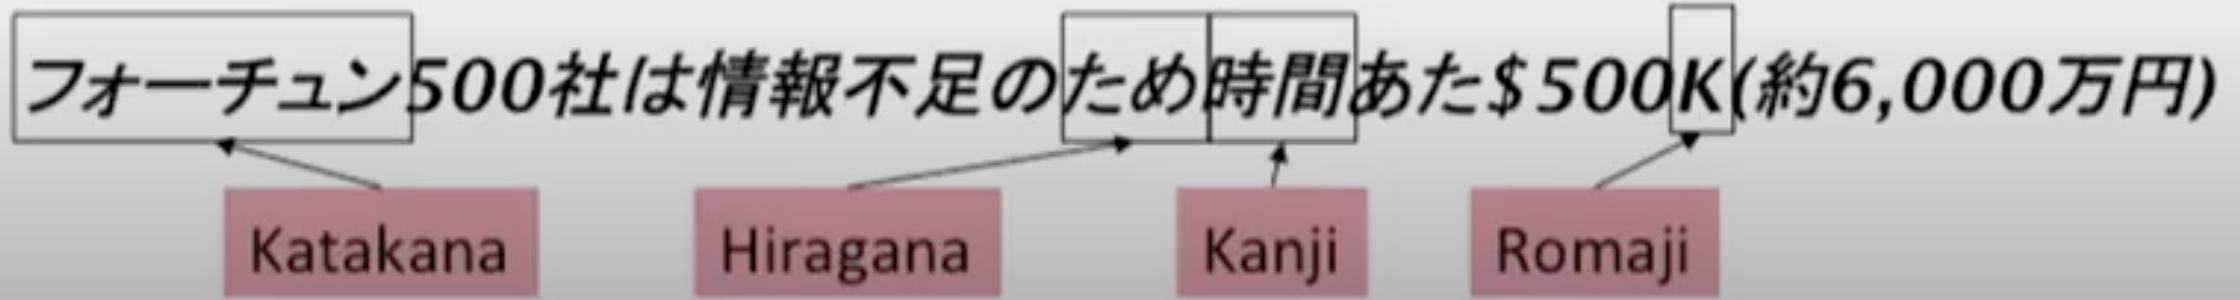

### Word tokenization in Chinese
* Chinese words composed of characters
    * Character = 1 syllable and 1 morpheme
    * Average word is 2.4 characters long
* We have an algorithm to segment words
    * "Maximum Matching" (AKA "Max Match" or "Greedy" algorithm)

### Maximum Matching
* Start with a dictionary (wordlist) of Chinese and a string<br>
1) Start pointer at the beginning of a string<br>
2) Find the longest word in the dictionary (wordlist) that matches the string at the pointer<br>
3) Move the pointer over the word in string<br>
4) Go to 2.

### Maximum Matching in "English"
* thecatinthehat

the cat in the hat

* thetabledownthere

theta bled own there

* Max Match not great for English because we have a lot of long words
* But pretty accurate for Chinese which has mostly two-character words

# Word normalization
* Transforming words to a common format
* Information retrieval: indexed text and query terms should have same form
    * U.S.A. = USA
    * windows vs. Windows
        * When might this not be accurate?

* What can we do?
    * Delete periods
    * **Asymmetric expansion**
        * _Enter_: window, _Search_: window, windows
        * _Enter_: windows, _Search_: Windows, windows, window
        * _Enter_: Windows, _Search_: Windows

* We've already done some forms of word normalization
    * Users tend to use lowercase
        * General Motors
        * fed vs. Fed
        * SAIL vs. sail
    * Not ALWAYS useful to reduce to lowercase
        * Sentiment analysis, MT, information extraction
        * US vs. us

## Lemmatization
Atlas's shoes are different colors --> Atlas shoe be different color

* Ex: Machine translation
    * Spanish:
        * _quiero_ 'I want', _quieres_ 'you want' from same lemma _querer_ 'want'

## Stemming
* Morphemes: stems and affixes
* A form of lemmatization that chops off suffixes so we can use the 'stems'
* Ex: cats --> cat
* Useful for information retrieval

### Porter stemmer
* https://tartarus.org/martin/PorterStemmer/index.html
* An algorithm or set of rules, specific to English, to transform all words to their stem
* Based on English orthography

##### Step 1a
| Rule     | Example |
| ----------- | ----------- |
| sses --> ss     | caresses --> caress       |
| ies --> i     | ponies --> poni       |
| ss --> ss   | caress --> caress        |
| s --> ∅   | cats --> cat        |

##### Step 1b
| Rule     | Example |
| ----------- | ----------- |
| (*V*)ing --> ∅     | walking --> walk       |
| (*V*)ed --> ∅     | painted --> paint       |

* And there are many many many more rules

In [29]:
from nltk.corpus import brown
import re

[w for w in set(brown.words()) if re.search("^..ing$",w)]

['wring',
 'sting',
 'Dying',
 'tying',
 'Lying',
 'thing',
 'dying',
 'doing',
 'sling',
 'Using',
 'aging',
 'suing',
 'going',
 'using',
 'vying',
 'Ching',
 'swing',
 'being',
 'Owing',
 'Bring',
 'cling',
 'Aging',
 'fling',
 'owing',
 'icing',
 'Being',
 'bring',
 'Swing',
 'Thing',
 'eying',
 'lying',
 'Going']

* The Porter stemmer is not perfect.
* We run into issues:

##### Overgeneralization - getting unrelated stems
* commercialization --> commercial
* organization --> organ

##### Undergeneralization - not getting the stems we need
* No rule to get Europe from European

But it's a good start!

### More good news! The nltk package has a built-in porter stemming function!
* No need to create a very long decision tree!

In [13]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
x = "The cat's tail was being pulled and the cat was angry"
x = word_tokenize(x)
print([ps.stem(w) for w in x])

['the', 'cat', "'s", 'tail', 'wa', 'be', 'pull', 'and', 'the', 'cat', 'wa', 'angri']


In [14]:
aliceTokens = word_tokenize(alice)
print([ps.stem(w) for w in aliceTokens][:100])

['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin', 'to', 'get', 'veri', 'tire', 'of', 'sit', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'have', 'noth', 'to', 'do', ':', 'onc', 'or', 'twice', 'she', 'had', 'peep', 'into', 'the', 'book', 'her', 'sister', 'wa', 'read', ',', 'but', 'it', 'had', 'no', 'pictur', 'or', 'convers', 'in', 'it', ',', "'and", 'what', 'is', 'the', 'use', 'of', 'a', 'book', ',', "'", 'thought', 'alic', "'without", 'pictur', 'or', 'convers', '?', "'", 'so', 'she', 'wa', 'consid', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot']


## Some languages have even more complex morphology!
* Ex: Turkish
    * Uygarlastiranadiklarimizdanmissinizcasina
    * '(behaving) as if you are among those whom we could not civilize'
    * _Uygar_ 'civilized' + _las_ 'become' + _tir_ 'cause' + _ama_ 'not able' + _dik_ 'past' + _lar_ 'plural' + _imiz_ 'p1pl' + _dan_ 'able' + _mis_ 'past' + _ siniz_ '2pl' + _ casina_ 'as if'

# Next week:
* Named Entity Recognition
* Edit distance
* Remember: Quiz 6 due tomorrow (Friday)